In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/copd-student-dataset/dataset.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras import layers,models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')
scaler = StandardScaler()
rfc = RandomForestClassifier(n_estimators=1000,max_depth = 2,random_state=42,)
svc = SVC(kernel = 'linear')
data  = pd.read_csv('/kaggle/input/copd-student-dataset/dataset.csv')
data.head()

2025-07-21 10:22:06.622894: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753093326.898868      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753093326.976459      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


,Unnamed: 0,ID,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,...,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,1,58,77,60.0,SEVERE,120.0,120.0,120.0,1.21,36.0,...,69.55,4,3,1,2,1,0,0,1,0
1,2,57,79,50.0,MODERATE,165.0,176.0,176.0,1.09,56.0,...,44.24,4,2,0,2,1,0,0,1,1
2,3,62,80,11.0,MODERATE,201.0,180.0,201.0,1.52,68.0,...,44.09,4,2,0,2,1,0,0,1,0
3,4,145,56,60.0,VERY SEVERE,210.0,210.0,210.0,0.47,14.0,...,62.04,1,4,1,2,0,0,1,1,0
4,5,136,65,68.0,SEVERE,204.0,210.0,210.0,1.07,42.0,...,75.56,1,3,1,2,0,1,1,0,0


In [4]:
data.columns

Index(['Unnamed: 0', 'ID', 'AGE', 'PackHistory', 'COPDSEVERITY', 'MWT1',
       'MWT2', 'MWT1Best', 'FEV1', 'FEV1PRED', 'FVC', 'FVCPRED', 'CAT', 'HAD',
       'SGRQ', 'AGEquartiles', 'copd', 'gender', 'smoking', 'Diabetes',
       'muscular', 'hypertension', 'AtrialFib', 'IHD'],
      dtype='object')

In [5]:
print(data['copd'].value_counts())
print(data['COPDSEVERITY'].value_counts())

copd
2    43
3    27
1    23
4     8
Name: count, dtype: int64
COPDSEVERITY
MODERATE       43
SEVERE         27
MILD           23
VERY SEVERE     8
Name: count, dtype: int64


In [6]:
columns = ['Unnamed: 0','ID','COPDSEVERITY','MWT1','MWT2']
data.drop(columns=columns, axis=1,inplace=True)
data.shape

(101, 19)

In [7]:
data.head()

,AGE,PackHistory,MWT1Best,FEV1,FEV1PRED,FVC,FVCPRED,CAT,HAD,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,77,60.0,120.0,1.21,36.0,2.40,98,25,8.0,69.55,4,3,1,2,1,0,0,1,0
1,79,50.0,176.0,1.09,56.0,1.64,65,12,21.0,44.24,4,2,0,2,1,0,0,1,1
2,80,11.0,201.0,1.52,68.0,2.30,86,22,18.0,44.09,4,2,0,2,1,0,0,1,0
3,56,60.0,210.0,0.47,14.0,1.14,27,28,26.0,62.04,1,4,1,2,0,0,1,1,0
4,65,68.0,210.0,1.07,42.0,2.91,98,32,18.0,75.56,1,3,1,2,0,1,1,0,0


In [8]:
data.drop(data[data['AGE']==10].index,axis=0,inplace=True)
data.drop(data[data['AGE']==30].index,axis=0,inplace=True)

In [9]:
data.isna().sum()

AGE             0
PackHistory     0
MWT1Best        1
FEV1            0
FEV1PRED        0
FVC             0
FVCPRED         0
CAT             0
HAD             0
SGRQ            0
AGEquartiles    0
copd            0
gender          0
smoking         0
Diabetes        0
muscular        0
hypertension    0
AtrialFib       0
IHD             0
dtype: int64

In [10]:
data.fillna(data.mean(),inplace=True)
data.isna().sum()

AGE             0
PackHistory     0
MWT1Best        0
FEV1            0
FEV1PRED        0
FVC             0
FVCPRED         0
CAT             0
HAD             0
SGRQ            0
AGEquartiles    0
copd            0
gender          0
smoking         0
Diabetes        0
muscular        0
hypertension    0
AtrialFib       0
IHD             0
dtype: int64

In [11]:
data.duplicated().sum()

0

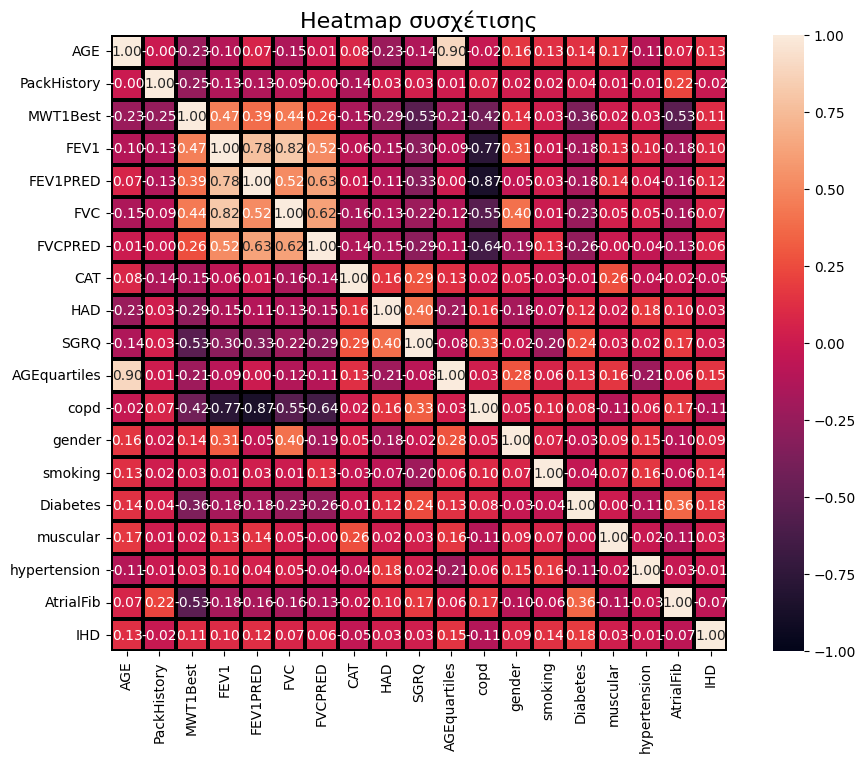

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(),
            annot=True,
            fmt='.2f',
            cmap='rocket',         # έντονο colormap
            vmin=-1, vmax=1,       # contrast
            linewidths=1.5,        # παχιές γραμμές
            linecolor='black',     # μαύρες γραμμές
            square=True)           # τετράγωνα κελιά
plt.title('Heatmap συσχέτισης', fontsize=16)
plt.show()


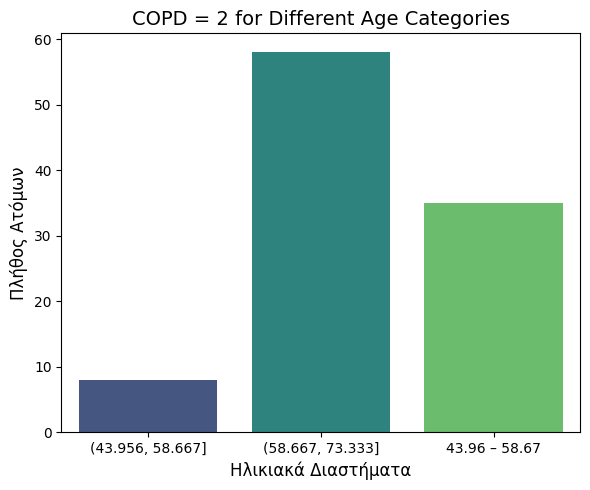

In [13]:
# Ομαδοποίηση ηλικιών σε 3 bins και καταμέτρηση
age_bins = pd.cut(data['AGE'], bins=3)
age = data.groupby(age_bins).size().reset_index(name='Age')
age.columns = ['Range', 'Age']

# Προαιρετική αλλαγή ετικέτας συγκεκριμένου range (αν επιθυμείς)
age['Range'] = age['Range'].astype(str)
age.loc[2, 'Range'] = '43.96 – 58.67'  # πιο καθαρή μορφή

# Οπτικοποίηση
plt.figure(figsize=(6, 5))
sns.barplot(data=age, x='Range', y='Age', palette='viridis')
plt.title('COPD = 2 for Different Age Categories', fontsize=14)
plt.xlabel('Ηλικιακά Διαστήματα', fontsize=12)
plt.ylabel('Πλήθος Ατόμων', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


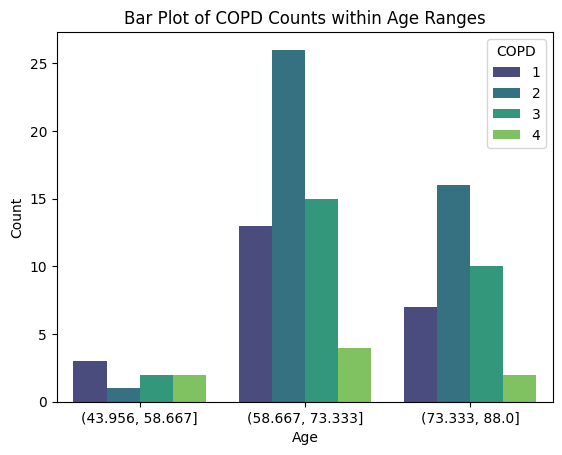

In [14]:
data['copd'].value_counts()

df = data.groupby([pd.cut(data['AGE'], bins=3),'copd']).size().unstack().reset_index().rename(columns={'index': 'AGE'})
df_melted = pd.melt(df, id_vars=['AGE'], var_name='COPD', value_name='Count')
sns.barplot(x='AGE', y='Count', hue='COPD', data=df_melted, palette='viridis')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Bar Plot of COPD Counts within Age Ranges')
plt.legend(title='COPD')
plt.show()


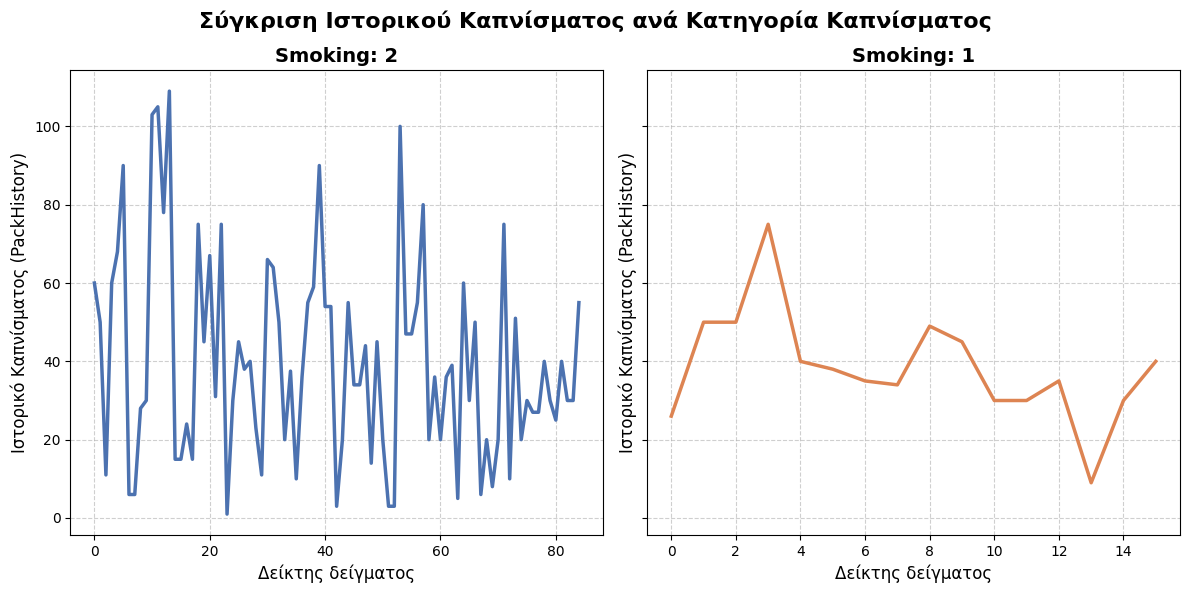

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Χρωματική παλέτα για διαφορετικά subplots
colors = ['#4c72b0', '#dd8452']  # π.χ. μπλε και πορτοκαλί

for count, i in enumerate(data['smoking'].unique()):
    subset = data[data['smoking'] == i].reset_index()
    
    ax[count].set_title(f'Smoking: {i}', fontsize=14, fontweight='bold')
    ax[count].plot(subset.index, subset['PackHistory'], color=colors[count], linewidth=2.5)
    ax[count].set_xlabel('Δείκτης δείγματος', fontsize=12)
    ax[count].set_ylabel('Ιστορικό Καπνίσματος (PackHistory)', fontsize=12)
    ax[count].grid(True, linestyle='--', alpha=0.6)

fig.suptitle('Σύγκριση Ιστορικού Καπνίσματος ανά Κατηγορία Καπνίσματος', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()


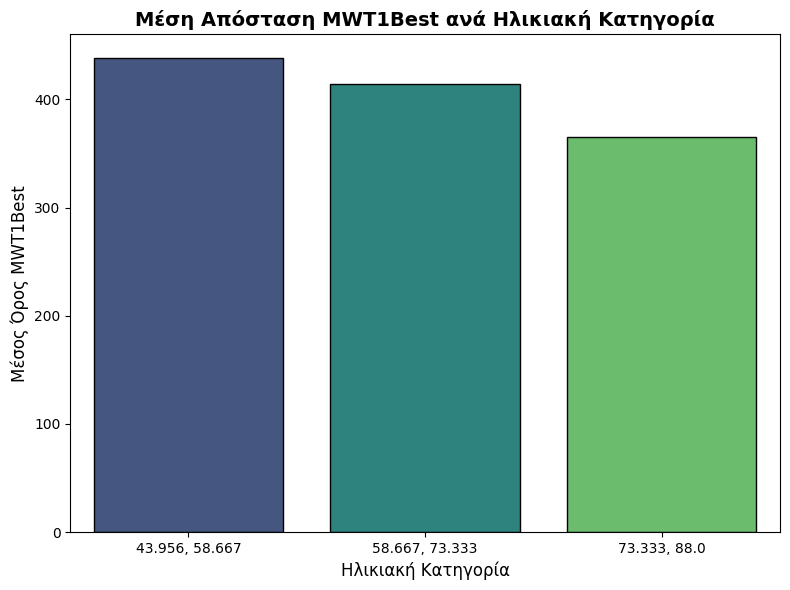

In [16]:
# Βήμα 1: Επιλογή και μετατροπή στηλών
columns = ['AGE', 'MWT1Best']
df = data[columns].copy()

# Μετατροπή σε αριθμούς και ομαδοποίηση ηλικιών
df['MWT1Best'] = pd.to_numeric(df['MWT1Best'], errors='coerce')
df['Age Range'] = pd.cut(df['AGE'], bins=3)

# Βήμα 2: Υπολογισμός μέσης τιμής MWT1Best ανά ηλικιακό εύρος
grouped = df.groupby('Age Range')['MWT1Best'].mean().reset_index()

# Προσαρμογή του label εύρους ηλικιών για καλύτερη εμφάνιση
grouped['Age Range'] = grouped['Age Range'].astype(str).str.replace('[\[\]\(\)]', '', regex=True)

# Βήμα 3: Οπτικοποίηση
plt.figure(figsize=(8, 6))
sns.barplot(data=grouped, x='Age Range', y='MWT1Best', palette='viridis', edgecolor='black')

plt.title('Μέση Απόσταση MWT1Best ανά Ηλικιακή Κατηγορία', fontsize=14, fontweight='bold')
plt.xlabel('Ηλικιακή Κατηγορία', fontsize=12)
plt.ylabel('Μέσος Όρος MWT1Best', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


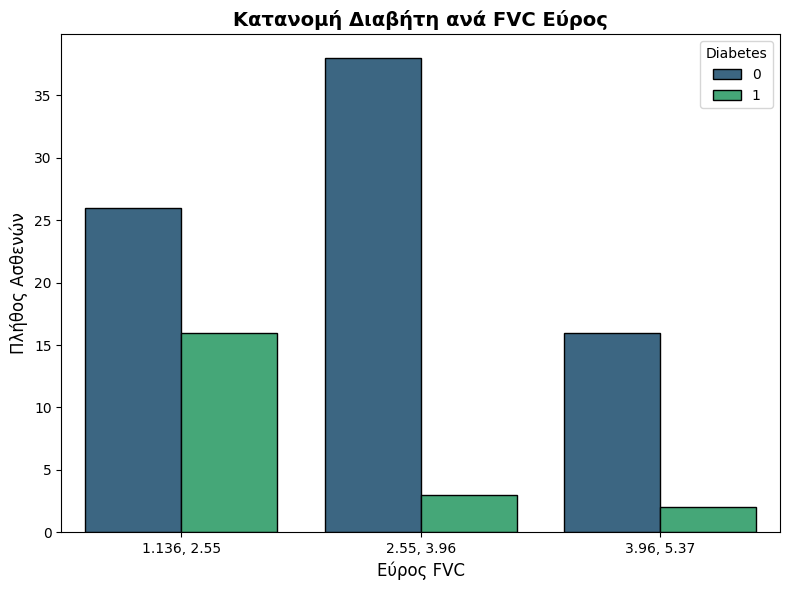

In [17]:
df = data[['FVC', 'Diabetes']].copy()
df['FVC Range'] = pd.cut(df['FVC'], bins=3)

# Ομαδοποίηση και μετασχηματισμός
grouped = df.groupby(['FVC Range', 'Diabetes']).size().unstack(fill_value=0).reset_index()
df_melted = pd.melt(grouped, id_vars=['FVC Range'], var_name='Diabetes', value_name='Count')

# Μορφοποίηση ετικετών
df_melted['FVC Range'] = df_melted['FVC Range'].astype(str).str.replace(r'[\[\]\(\)]', '', regex=True)

# Barplot
plt.figure(figsize=(8, 6))
sns.barplot(data=df_melted, x='FVC Range', y='Count', hue='Diabetes', palette='viridis', edgecolor='black')
plt.title('Κατανομή Διαβήτη ανά FVC Εύρος', fontsize=14, fontweight='bold')
plt.xlabel('Εύρος FVC', fontsize=12)
plt.ylabel('Πλήθος Ασθενών', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


count    101.000000
mean      19.336634
std       18.674730
min        3.000000
25%       12.000000
50%       18.000000
75%       24.000000
max      188.000000
Name: CAT, dtype: float64


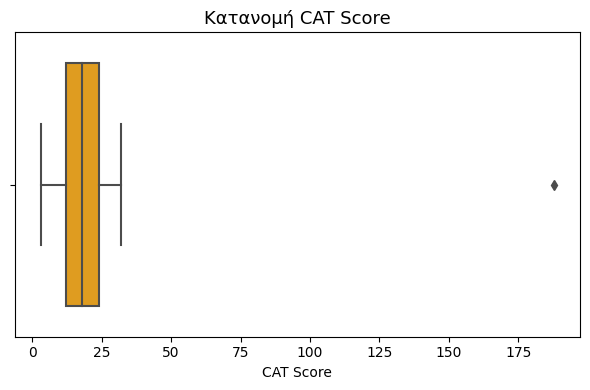

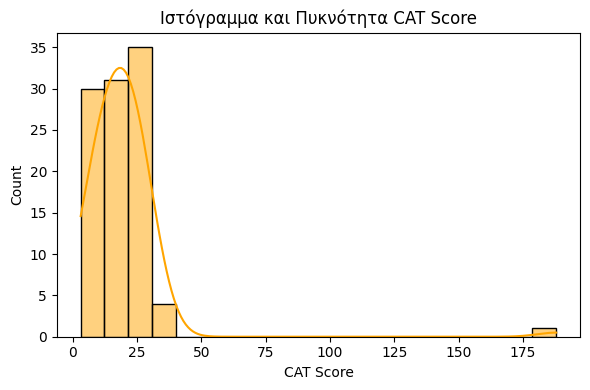

In [18]:
# Περιγραφική Στατιστική
print(data['CAT'].describe())

# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=data['CAT'], saturation=0.75, color='orange')
plt.title('Κατανομή CAT Score', fontsize=13)
plt.xlabel('CAT Score')
plt.tight_layout()
plt.show()

# Ιστόγραμμα & KDE
plt.figure(figsize=(6,4))
sns.histplot(data['CAT'], kde=True, color='orange', bins=20)
plt.title('Ιστόγραμμα και Πυκνότητα CAT Score')
plt.xlabel('CAT Score')
plt.tight_layout()
plt.show()


In [19]:
data['CAT'].value_counts(bins=2)

(2.814, 95.5]    100
(95.5, 188.0]      1
Name: count, dtype: int64

In [20]:
data['gender'].unique()

array([1, 0])

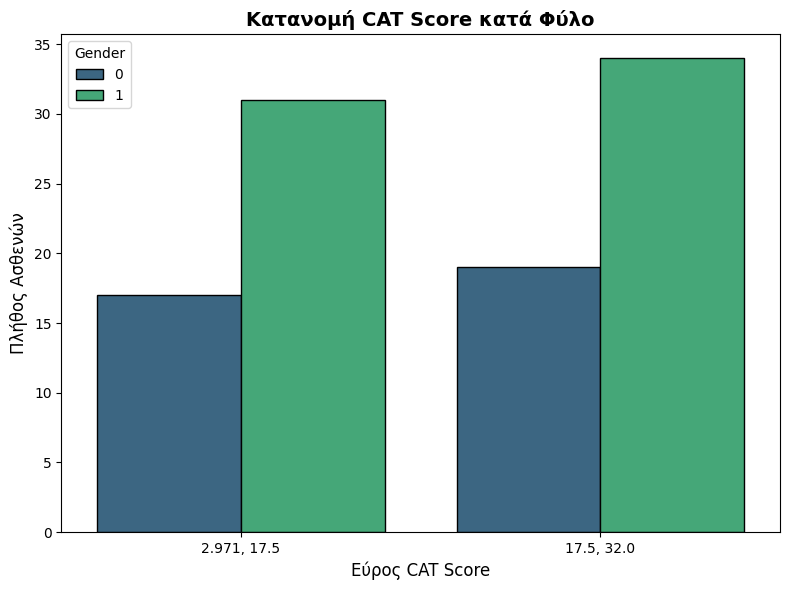

In [21]:
# Διόρθωση τιμών φύλου και εξομάλυνση outliers στο CAT
data.loc[data['gender'].isin([10, 30]), 'gender'] = 1
data.loc[data['CAT'] >= 100, 'CAT'] = data['CAT'].median()

# Δημιουργία υποσύνολου
df = data[['CAT', 'gender']].copy()

# Κατηγοριοποίηση του CAT σε 2 επίπεδα (π.χ. Χαμηλό / Υψηλό)
df['CAT Range'] = pd.cut(df['CAT'], bins=2)

# Ομαδοποίηση κατά εύρος CAT και φύλο
res = df.groupby(['CAT Range', 'gender']).size().unstack(fill_value=0).reset_index()

# Καθαρισμός εμφάνισης κατηγορίας CAT Range
res['CAT Range'] = res['CAT Range'].astype(str).str.replace(r'[\[\]\(\)]', '', regex=True)

# Οπτικοποίηση
res_melted = pd.melt(res, id_vars='CAT Range', var_name='Gender', value_name='Count')

plt.figure(figsize=(8,6))
sns.barplot(data=res_melted, x='CAT Range', y='Count', hue='Gender', palette='viridis', edgecolor='black')
plt.title('Κατανομή CAT Score κατά Φύλο', fontsize=14, fontweight='bold')
plt.xlabel('Εύρος CAT Score', fontsize=12)
plt.ylabel('Πλήθος Ασθενών', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


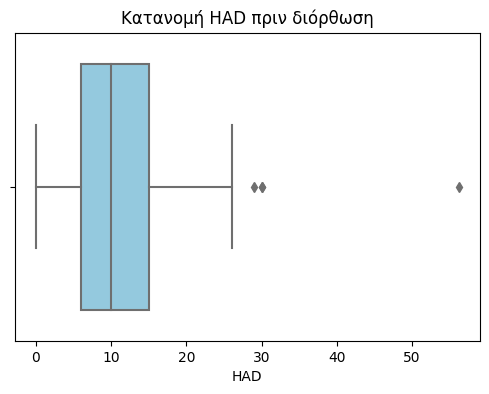

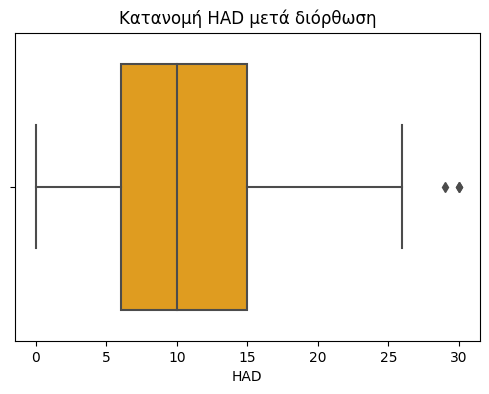

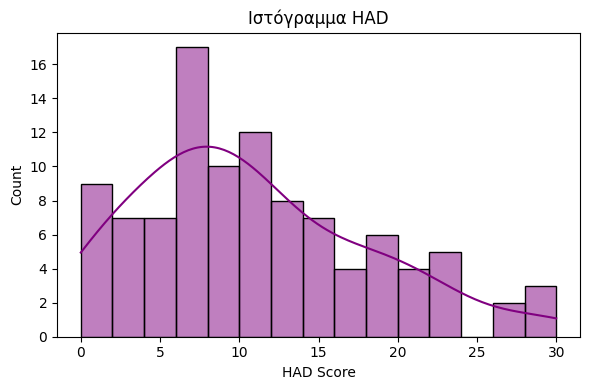

In [22]:
# Boxplot & histogram για HAD πριν και μετά outlier correction
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['HAD'], color='skyblue')
plt.title('Κατανομή HAD πριν διόρθωση')
plt.show()

# Αντικατάσταση outliers
data.loc[data['HAD'] >= 50, 'HAD'] = data['HAD'].median()

plt.figure(figsize=(6, 4))
sns.boxplot(x=data['HAD'], color='orange')
plt.title('Κατανομή HAD μετά διόρθωση')
plt.show()

# Κατανομή με histogram + KDE
plt.figure(figsize=(6, 4))
sns.histplot(data['HAD'], kde=True, color='purple', bins=15)
plt.title('Ιστόγραμμα HAD')
plt.xlabel('HAD Score')
plt.tight_layout()
plt.show()


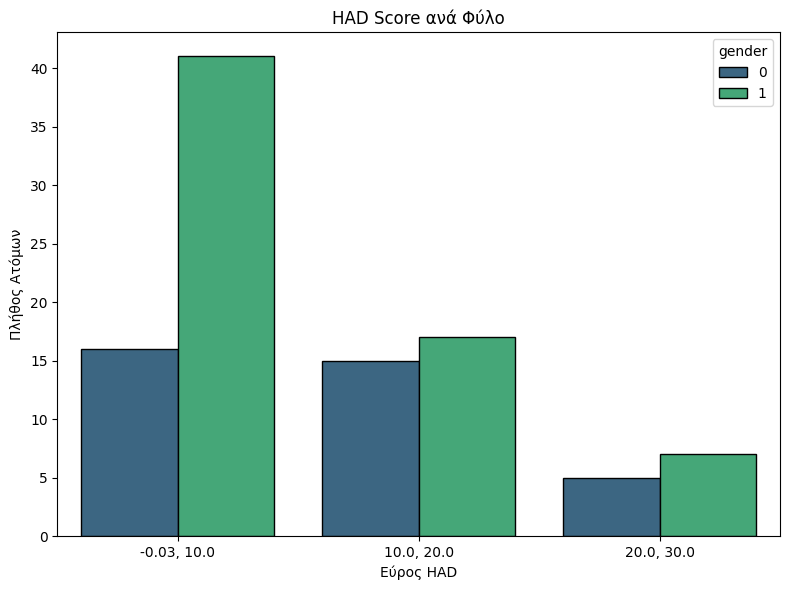

In [23]:
df = data[['HAD', 'gender']].copy()
df['HAD Range'] = pd.cut(df['HAD'], bins=3)

# Ομαδοποίηση
res = df.groupby(['HAD Range', 'gender']).size().unstack(fill_value=0).reset_index()
res['HAD Range'] = res['HAD Range'].astype(str).str.replace(r'[\[\]\(\)]', '', regex=True)

df_melt = pd.melt(res, id_vars='HAD Range', var_name='gender', value_name='Counts')

# Barplot
plt.figure(figsize=(8, 6))
sns.barplot(data=df_melt, x='HAD Range', y='Counts', hue='gender', palette='viridis', edgecolor='black')
plt.title('HAD Score ανά Φύλο')
plt.xlabel('Εύρος HAD')
plt.ylabel('Πλήθος Ατόμων')
plt.tight_layout()
plt.show()


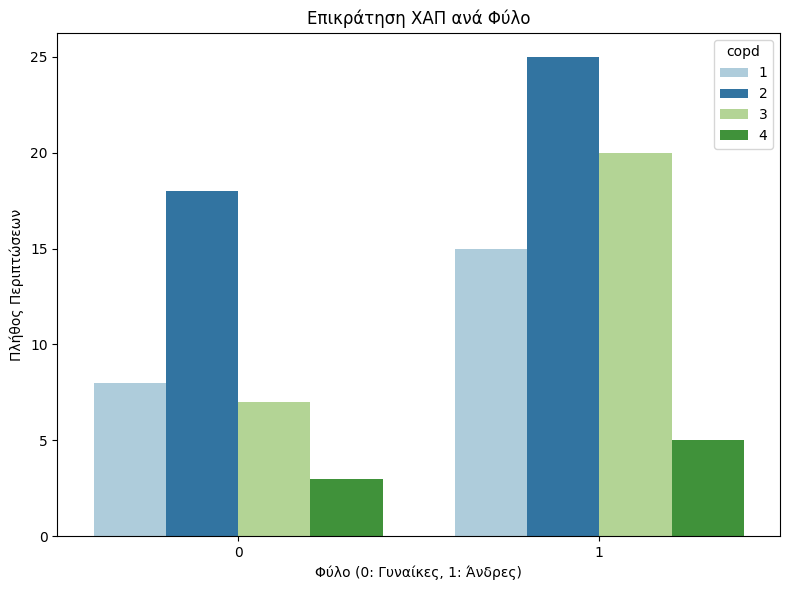

In [24]:
# Φιλτράρισμα, ομαδοποίηση
df = data[['gender', 'copd']]
females_COPD = df.groupby(['gender', 'copd']).size().unstack(fill_value=0).reset_index()

# Melt για barplot
res = females_COPD.melt(id_vars='gender', var_name='copd', value_name='Count')

# Barplot
custom_palette = sns.color_palette("Paired", len(res['copd'].unique()))
plt.figure(figsize=(8, 6))
sns.barplot(data=res, x='gender', y='Count', hue='copd', palette=custom_palette)
plt.title('Επικράτηση ΧΑΠ ανά Φύλο')
plt.xlabel('Φύλο (0: Γυναίκες, 1: Άνδρες)')
plt.ylabel('Πλήθος Περιπτώσεων')
plt.tight_layout()
plt.show()


In [25]:
# Αφαίρεση λανθασμένων τιμών
data.drop(data[data['AGE'] == 10].index, inplace=True)

# X: χαρακτηριστικά, y: στόχος
X = data.drop(columns='copd')
y = data['copd']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Κανονικοποίηση
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Μοντέλα
rfc_model = rfc.fit(X_train_scaled, y_train)
svc_model = svc.fit(X_train_scaled, y_train)

# Προβλέψεις
rfc_pred = rfc_model.predict(X_test_scaled)
svc_pred = svc_model.predict(X_test_scaled)

# Αξιολόγηση
print("Random Forest Classifier")
print(classification_report(y_test, rfc_pred))

print("Support Vector Classifier")
print(classification_report(y_test, svc_pred))


Random Forest Classifier
              precision    recall  f1-score   support

           1       1.00      0.20      0.33         5
           2       0.38      1.00      0.56         5
           3       0.71      0.56      0.63         9
           4       0.00      0.00      0.00         2

    accuracy                           0.52        21
   macro avg       0.52      0.44      0.38        21
weighted avg       0.64      0.52      0.48        21

Support Vector Classifier
              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
           2       0.56      1.00      0.71         5
           3       0.86      0.67      0.75         9
           4       1.00      1.00      1.00         2

    accuracy                           0.76        21
   macro avg       0.85      0.82      0.80        21
weighted avg       0.83      0.76      0.77        21



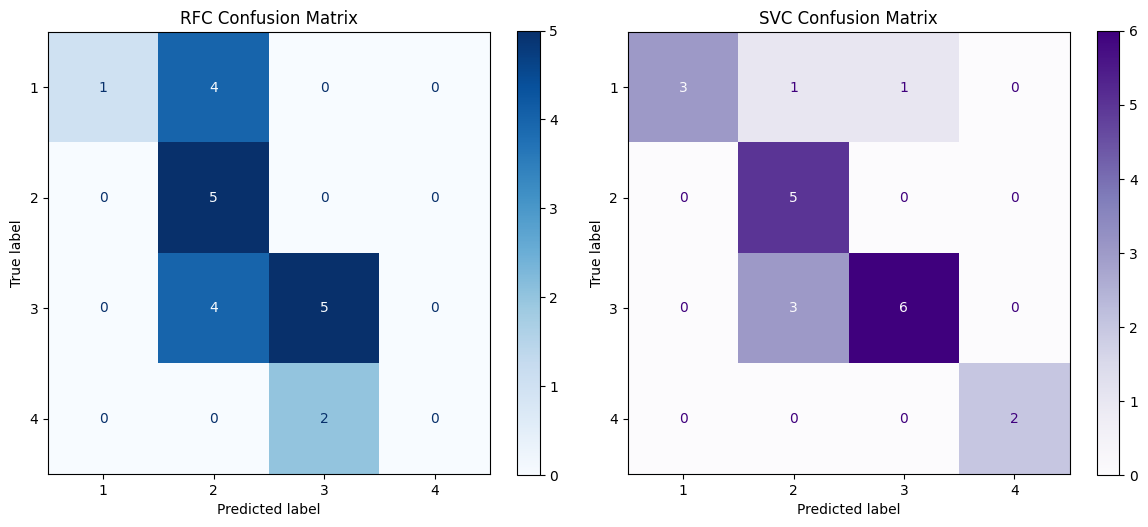

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_predictions(y_test, rfc_pred, ax=ax[0], cmap='Blues')
ax[0].set_title('RFC Confusion Matrix')

ConfusionMatrixDisplay.from_predictions(y_test, svc_pred, ax=ax[1], cmap='Purples')
ax[1].set_title('SVC Confusion Matrix')

plt.tight_layout()
plt.show()


In [27]:
from sklearn.metrics import accuracy_score

rfc_acc = accuracy_score(y_test, rfc_pred) * 100
svc_acc = accuracy_score(y_test, svc_pred) * 100

print(f'🎯 Accuracy of Random Forest Classifier : {rfc_acc:.2f}%')
print(f'⚙️  Accuracy of Support Vector Classifier : {svc_acc:.2f}%')


🎯 Accuracy of Random Forest Classifier : 52.38%
⚙️  Accuracy of Support Vector Classifier : 76.19%


In [30]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(18,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='softmax') 
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
y_train-=1
y_test-=1
history = model.fit(X_train_scaled, y_train,epochs=50,batch_size=32)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.2375 - loss: 1.3822
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3508 - loss: 1.3604
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3953 - loss: 1.3437
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3641 - loss: 1.3352
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3781 - loss: 1.3149
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4594 - loss: 1.2955
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4828 - loss: 1.2883
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5531 - loss: 1.2662
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5398 - loss: 1.2429
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5680 - loss: 1.2321
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5906 - loss: 1.2079
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6008 - loss: 1.1932
E

In [31]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(18,)),   # Πρώτο κρυφό επίπεδο
    layers.Dense(32, activation='relu'),                      # Δεύτερο
    layers.Dense(16, activation='relu'),                      # Τρίτο
    layers.Dense(8, activation='relu'),                       # Τέταρτο
    layers.Dense(4, activation='softmax')                     # Έξοδος: 4 κλάσεις COPD
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [32]:
acc = history.history['accuracy']
loss = history.history['loss']
print(f'Accuracy of ANN is {round(acc[-1] * 100, 2)}%')
print(f'Loss of ANN is {loss[-1]}')

Accuracy of ANN is 97.5%
Loss of ANN is 0.1617259532213211


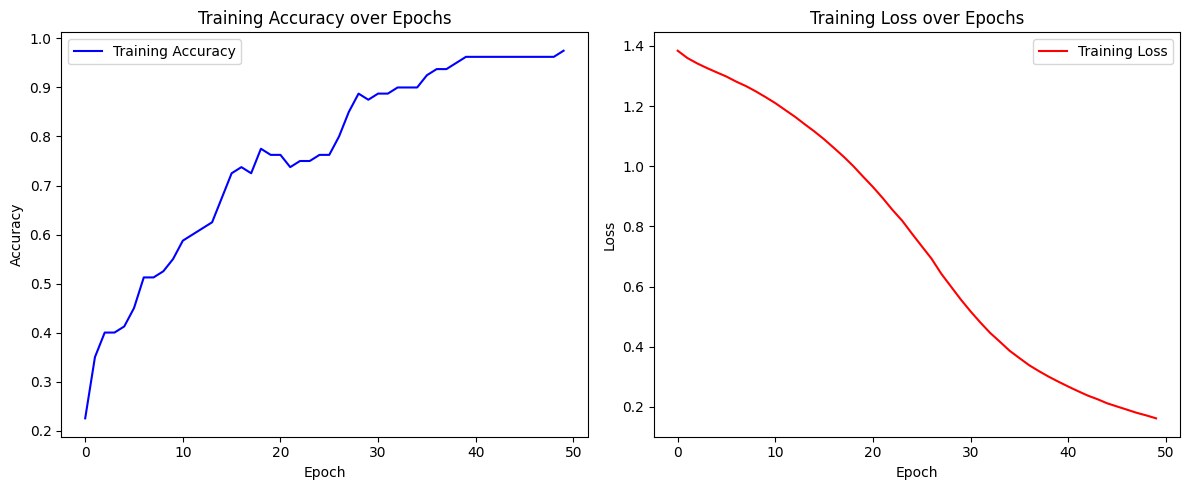

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [34]:
y_pred_nn = np.argmax(model.predict(X_test_scaled), axis=1)
print(classification_report(y_test, y_pred_nn))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
              precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       0.22      0.80      0.35         5
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         2

    accuracy                           0.24        21
   macro avg       0.14      0.25      0.15        21
weighted avg       0.13      0.24      0.14        21

